In [28]:
# what 100% access to electricity will look like in 2030

In [29]:
import pandas as pd # import and manage datasets
import numpy as np # mathematic library

In [30]:
# what cent electricity in India looks like
India_energy = pd.read_excel("cent_elec_1993-2017.xlsx")

In [31]:
India_energy = India_energy.set_index('Year')

In [32]:
India_energy

,Energy_con,Percentage_access,Population,cent_access
Year,,,,
1993,222.645002,50.900000,909307016,437.416508
1994,234.439233,49.815136,927403860,470.618476
1995,252.180017,51.398556,945601831,490.636388
1996,262.524797,52.985596,963922588,495.464463
1997,277.143608,54.577168,982365243,507.801376
1998,293.718679,56.173199,1000900030,522.880459
1999,301.684249,60.100000,1019483581,501.970464
2000,317.536857,59.361851,1038058156,534.917381
2001,319.346376,55.800000,1056575549,572.305333


In [33]:
pop_growth = pd.read_excel("population_growth_forecast_1960-2030_India.xlsx")

In [34]:
pop_growth = pop_growth.set_index('Year')

In [35]:
K = list(pop_growth['pop_pred'][57:])

In [36]:
index=list(range(24,38))

In [37]:
index

[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]

In [38]:
forcast_X1 = pd.DataFrame(list(range(2017,2031)), columns = ['Year'], index = index)

In [39]:
forcast_X1['Population'] = list(pop_growth['pop_pred'][57:])

In [40]:
# input is year,populatiion, output is cent_access
X1 = pd.DataFrame(list(range(1993,2018)), columns = ['Year'])
X1['Population'] = list(India_energy['Population'])
Y1 = India_energy['cent_access']

In [41]:
X1_train = X1[:20]
X1_test = X1[20:]
Y1_train = Y1[:20]
Y1_test = Y1[20:]

In [42]:
from sklearn.linear_model import Ridge

elec_pred = Ridge(alpha = 2.51)
elec_pred.fit(X1_train,Y1_train)

C:\Users\pooji\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.219448e-17
  overwrite_a=True).T


Ridge(alpha=2.51, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [43]:
y1_pred = elec_pred.predict(X1_test)
from sklearn import metrics
print("R^2:", metrics.r2_score(y1_pred, Y1_test))

R^2: 0.6100791008028612


In [44]:
y2_pred = elec_pred.predict(forcast_X1)

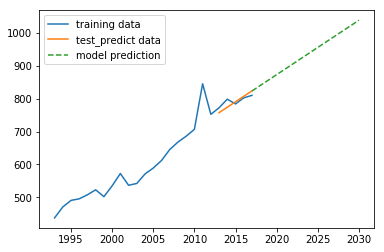

In [46]:
import matplotlib.pyplot as plt
plt.plot(X1['Year'], Y1, label='training data')
plt.plot(X1_test['Year'], y1_pred, label='test_predict data')
plt.plot(forcast_X1['Year'], y2_pred, '--', label='model prediction')
plt.legend()
plt.show()